In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

df = pd.DataFrame({"x": [1, 2, 3, 4, 5], "y": ["a", "b", "a", "b", "b"]})

Zadanie 1

In [2]:
df.groupby('y').mean()

,x
y,
a,2.000000
b,3.666667


Zadanie 2

In [3]:
df.value_counts('y')

y
b    3
a    2
dtype: int64

Zadanie 3

In [4]:
df = pd.read_csv("autos.csv")
df1 = np.loadtxt("autos.csv", delimiter=',', skiprows=1, dtype=str)
# read_csv tworzy ramkę danych, loadtxt tworzy macierz oraz potrzebuje dodatkowych argumentów

Zadanie 4

In [5]:
spalanie = df.groupby('make')[['city-mpg', 'highway-mpg']].mean()
spalanie['mean-mpg'] = (spalanie['city-mpg'] + spalanie['highway-mpg']) / 2
spalanie[['mean-mpg']]

,mean-mpg
make,
alfa-romero,23.500000
audi,21.500000
bmw,22.375000
chevrolet,43.666667
dodge,31.055556
honda,32.923077
isuzu,33.500000
jaguar,16.333333
mazda,28.823529


Zadanie 5

In [6]:
df['fuel-type'].value_counts()


gas       185
diesel     20
Name: fuel-type, dtype: int64

Zadanie 6

In [7]:
f = np.polyfit(df['length'], df['city-mpg'], 1)
f

array([-0.35576533, 87.14020723])

In [8]:
f1 = np.polyfit(df['length'], df['city-mpg'], 2)
f1

array([ 4.39610791e-03, -1.89441985e+00,  2.21104093e+02])

Zadanie 7

In [9]:
scipy.stats.pearsonr(df['length'], df['city-mpg'])[0]

-0.6709086615585711

Zadanie 8

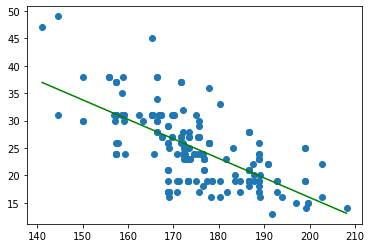

In [10]:
plt.scatter(df['length'], df['city-mpg'])
plt.plot(np.sort(df['length']), np.polyval(f, np.sort(df['length'])), color="green")

Zadanie 9

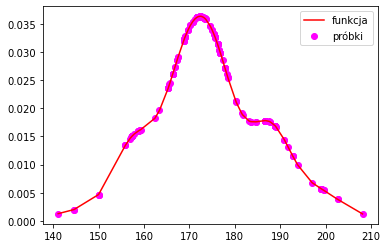

In [11]:
gauss = scipy.stats.gaussian_kde(df['length'])
plt.plot(np.sort(df['length']), gauss(np.sort(df['length'])), label="funkcja", color="red")
plt.scatter(np.sort(df['length']), gauss(np.sort(df['length'])), label="próbki", color="magenta")
plt.legend()

Zadanie 10

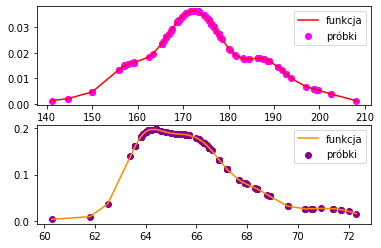

In [12]:
fig, ax = plt.subplots(2, 1)

gauss = scipy.stats.gaussian_kde(df['length'])
ax[0].plot(np.sort(df['length']), gauss(np.sort(df['length'])), color="red", label="funkcja")
ax[0].scatter(np.sort(df['length']), gauss(np.sort(df['length'])), color="magenta", label="próbki")
ax[0].legend()

gauss = scipy.stats.gaussian_kde(df['width'])
ax[1].plot(np.sort(df['width']), gauss(np.sort(df['width'])), color="darkorange", label="funkcja")
ax[1].scatter(np.sort(df['width']), gauss(np.sort(df['width'])), color="darkmagenta", label="próbki")
ax[1].legend()

Zadanie 11

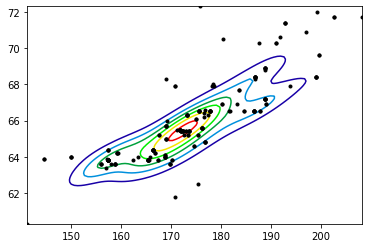

In [13]:
values = np.vstack([df['length'], df['width']])
kernel = scipy.stats.gaussian_kde(values)

l_min = df['length'].min()
l_max = df['length'].max()
w_min = df['width'].min()
w_max = df['width'].max()

# X, Y = np.mgrid[l_min:l_max:100j, w_min:w_max:100j]
X, Y = np.meshgrid(np.linspace(l_min, l_max, 100), np.linspace(w_min, w_max, 100))

positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kernel(positions).T, X.shape)

plt.contour(X, Y, Z, cmap="nipy_spectral")
plt.plot(df['length'], df['width'], color="black", linestyle="None", marker='o', markersize=3)

plt.savefig("contour.png")
plt.savefig("contour.pdf")